<a href="https://colab.research.google.com/github/mrmiraz/Digit_Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

###Import data from mnist dataset

In [ ]:
from keras.datasets import mnist
objects = mnist
(train_img, train_label), (test_img, test_label) = objects.load_data()

In [ ]:
#how many image in train and test dataset
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


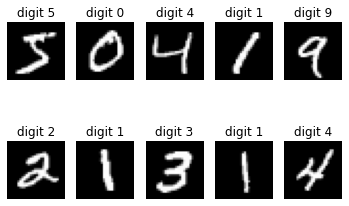

In [ ]:
#show image of training data set
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_img[i], cmap = "gray")
  plt.axis("off")
  plt.title("digit {}".format(train_label[i]))


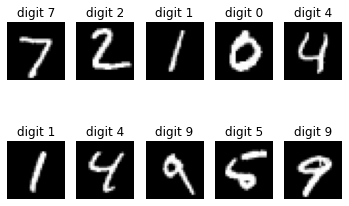

In [ ]:
#show image of test data set
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(test_img[i], cmap = "gray")
  plt.axis("off")
  plt.title("digit {}".format(test_label[i]))

In [ ]:
#how image actually looks like in digits
print(train_img[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##Normalize the data 

In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

###Creat the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()

In [ ]:
input_layer = Flatten(input_shape = (28, 28))
hidden_layer1 = Dense(512, activation = "relu")
hidden_layer2 = Dense(512, activation = "relu")
output_layer = Dense(10, activation = "softmax")
model.add(input_layer)
model.add(hidden_layer1)
model.add(hidden_layer2)
model.add(output_layer)

###Compile or train the *model*

In [ ]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.fit(train_img, train_label, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1828 - accuracy: 0.9435
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9750
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - accuracy: 0.9830
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0438 - accuracy: 0.9858
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0215 - accuracy: 0.9931
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9940
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - l

In [ ]:
model.save("digit_Recognization.h5")

### Test the model

In [ ]:
loss_and_acc = model.evaluate(test_img, test_label)
print("loss: ", loss_and_acc[0])
print("accuracy: ", loss_and_acc[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2156 - accuracy: 0.9820
loss:  0.21562668681144714
accuracy:  0.9819999933242798


###Prediction with hand writting image

Predicted digit:  0
Succesfull prediction....


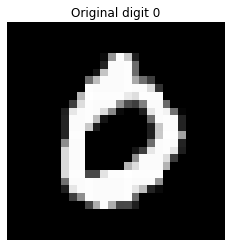

In [ ]:
#test with test_img data
i = 3
plt.imshow(test_img[i], cmap = "gray")
plt.axis("off")
plt.title("Original digit {}".format(test_label[i]))
prediction = model.predict(test_img)
print("Predicted digit: ", np.argmax(prediction[i]))
if(test_label[i] == np.argmax(prediction[i])):
  print("Succesfull prediction....")
else:
  print("Unsuccesfull prediction...")

##image processing with keras 

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

def load_image(file_name):
  img = load_img(file_name, grayscale = True, target_size= (28, 28))
  img = img_to_array(img)
  img = img.reshape(1, 28, 28)
  img = img.astype("float32")
  img = img/255.0
  return img

In [ ]:
#import file from local to colab
from google.colab import files
upload = files.upload()

Saving 0.png to 0.png


9
Original Digit:  9
Predicted Digit:  9
Successfull prediction>>


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


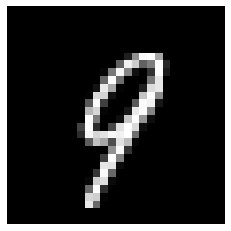

In [ ]:
test_digit = int(input())
test_img_name = "{}.png".format(test_digit)
img = load_image(test_img_name)
prediction = model.predict(img)

print("Original Digit: ", test_digit)
predicted_digit = np.argmax(prediction)
print("Predicted Digit: ", predicted_digit)
if(predicted_digit == test_digit):
  print("Successfull prediction>>")
else:
  print("Unsuccesfull prediction>>")
#display image
from IPython.display import Image
Image(test_img_name, width = 250, height= 250)